In [1]:
import numpy as np
#import tensorflow as tf
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.


tf.test.is_gpu_available()

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession, Session
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = Session(config=config)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

In [2]:
(x_train, y_train), (x_test,y_test)=cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(50000, 32, 32, 3)

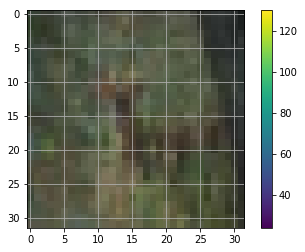

In [5]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid()
plt.show()

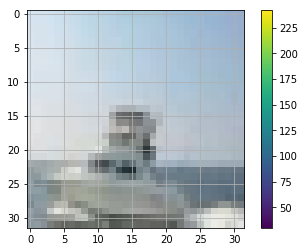

In [6]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid()
plt.show()

In [7]:
Num_classes=10

#normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [8]:
#Converting interger label to one-hot encoding vector
y_train=to_categorical(y_train, Num_classes)
y_test=to_categorical(y_test, Num_classes)

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [9]:
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from keras.models import Model
from keras.optimizers import Adam

In [10]:
#Creating model
input_layer=Input((32, 32, 3))

x=Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2,  padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)

x=Dense(128)(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)

x=Dense(Num_classes)(x)
output_layer=Activation('softmax')(x)
model=Model(input_layer, output_layer)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2

In [11]:
opt=Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train
          , y_train
          , epochs=10
          )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 187s 4ms/step - loss: 1.5275 - acc: 0.4684
Epoch 2/10
50000/50000 [==============================] - 186s 4ms/step - loss: 1.1236 - acc: 0.6042
Epoch 3/10
50000/50000 [==============================] - 185s 4ms/step - loss: 0.9919 - acc: 0.6525
Epoch 4/10
50000/50000 [==============================] - 187s 4ms/step - loss: 0.9060 - acc: 0.6818
Epoch 5/10
50000/50000 [==============================] - 189s 4ms/step - loss: 0.8518 - acc: 0.7024
Epoch 6/10
50000/50000 [==============================] - 190s 4ms/step - loss: 0.7996 - acc: 0.7198
Epoch 7/10
50000/50000 [==============================] - 186s 4ms/step - loss: 0.7523 - acc: 0.7374
Epoch 8/10
50000/50000 [==============================] - 186s 4ms/step - loss: 0.7138 - acc: 0.7493
Epoch 9/10
50000/50000 [==============================] - 186s 4ms/step - loss: 0.6804 - acc: 0.7616
Epoch 10/10
50000/50000 [==================

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 721us/step


[0.8771176191806793, 0.7078]